### EDA on kaggle dataset of chairs

# Importing Data into DF and viewing images

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
import torch
from torchvision import transforms
from torchvision.models import resnet50
from umap import UMAP
import plotly.express as px
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

2024-03-23 11:48:51.369149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 11:48:51.369221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 11:48:51.373740: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 11:48:51.387624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 11:48:52.430960: W tensorflow/compiler/tf2

In [2]:
#UNCOMMENT

# chair_folder = 'Yolo_Images'

# # Function to read and display images
# def display_images(folder_path):
#     images = os.listdir(folder_path)
#     image_list = []
    
#     for image_name in images:
#         if image_name.endswith('.jpg'):
#             image_path = os.path.join(folder_path, image_name)
            
#             # Read image using PIL (Python Imaging Library)
#             image = Image.open(image_path)
            
#             # Convert image to numpy array
#             image_data = plt.imread(image_path)
            
#             # Append image and file name to a list
#             image_list.append({'Image': image_data, 'File Name': image_name})
    
#     # Create a DataFrame from the image data
#     df_images = pd.DataFrame(image_list)
    
#     return df_images

# # Create DataFrame with images
# df_images = display_images(chair_folder)
# df_images['File Name'] = (df_images.index + 1).astype(str)

In [3]:
# df_images.head(5)

In [4]:

# # Display the first image
# first_image = df_images.iloc[2]['Image']
# first_image_name = df_images.iloc[2]['File Name']

# plt.imshow(first_image)
# plt.title(first_image_name)
# plt.axis('off')
# plt.show()


## Resolution of images

In [5]:
# #UNCOMMENT
# # Function to get image resolution
# def get_image_resolution(image_array):
#     if len(image_array.shape) == 3:  # Check if it's a color image
#         height, width, _ = image_array.shape
#     else:  # Grayscale or single-channel image
#         height, width = image_array.shape
#     return (width, height)

# # Apply the function to get resolution for the first image
# first_image_resolution = get_image_resolution(df_images['Image'][0])

# # Print the resolution of the first image
# print("Resolution of the first image:", first_image_resolution)


## Each Image has a different resolution, all pictures must be converted to 250 x 250 pixels 

In [6]:
# # Preprocessing to change resolution of dataset into 100 x 100 resolution and normalize -- Greyscale conversion 

# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path

# # Function to resize and normalize an image
# def preprocess_image(image_path, target_size=(250, 250)):
#     # Open the image
#     with Image.open(image_path) as img:
#         # Resize the image to the target size
#         resized_img = img.resize(target_size)
#         # Convert the image to grayscale and convert to numpy array
#         resized_array = np.array(resized_img.convert('RGB'))
#         # Normalize pixel values to be between 0 and 1
#         normalized_array = resized_array / 255.0
#     return normalized_array

# # Path to the folder containing your images
# images_folder = Path('train/chair')

# # List to store processed images
# processed_images = []

# # Loop through each image file in the folder
# for image_file in images_folder.glob("*.jpg"):
#     processed_image = preprocess_image(image_file)
#     processed_images.append(processed_image)

# # Convert the list of images to a numpy array
# processed_images_array = np.array(processed_images)


# # Check the shape of the processed images array
# print("Processed Images Shape:", processed_images_array.shape)

# # Display one of the processed images
# plt.imshow(processed_images_array[1510], cmap='gray')
# plt.title("Processed Image")
# plt.axis('off')
# plt.show()

In [7]:
# # Preprocessing to change resolution of dataset into 250 x 250 resolution and normalize -- RGB

# # Takes all image types and converts to .jpg, skip files that are not pictures in the image directory
# # Preprocess into 250 x 250 and makes all pictures have the same aspect.
# # Normalizes each image and stores in a norm_processed_images_array for feature embeddings.
# # Stores all the newly processed .jpgs in a new folder.

# import numpy as np
# from PIL import Image
# from pathlib import Path
# import mimetypes

# def preprocess_image(image_path, target_size=(250, 250), fill_color=(255, 255, 255)):
#     """
#     Preprocess an image by resizing it to the target size while maintaining aspect ratio.
#     The image will be resized to fit within the target size and padded with fill color if necessary.
    
#     Args:
#         image_path (str): Path to the image file.
#         target_size (tuple): Target size to resize the image to.
#         fill_color (tuple): RGB color tuple for fill color when padding.
    
#     Returns:
#         numpy.ndarray: Processed image array.
#     """
#     image = Image.open(image_path)
#     width, height = image.size
#     target_width, target_height = target_size
    
#     # Calculate aspect ratios
#     aspect_ratio = width / height
#     target_aspect_ratio = target_width / target_height
    
#     # Resize image to fit within the target size
#     if aspect_ratio > target_aspect_ratio:
#         # Fit width to target width
#         new_width = target_width
#         new_height = int(target_width / aspect_ratio)
#     else:
#         # Fit height to target height
#         new_height = target_height
#         new_width = int(target_height * aspect_ratio)
    
#     # Resize image
#     resized_img = image.resize((new_width, new_height))
    
#     # Create new image with target size and fill color
#     padded_img = Image.new('RGB', target_size, fill_color)
    
#     # Paste resized image onto the new image
#     left = (target_width - new_width) // 2
#     top = (target_height - new_height) // 2
#     padded_img.paste(resized_img, (left, top))
    
#     # Convert to numpy array
#     resized_array = np.array(padded_img)
    
#     return resized_array

# def normalize_images(images_array):
#     """
#     Normalize images array between 0 and 1.
    
#     Args:
#         images_array (numpy.ndarray): Array of images.
    
#     Returns:
#         numpy.ndarray: Normalized images array.
#     """
#     return images_array / 255.0

# # Path to the folder containing images
# images_folder = Path('Yolo_Images')

# # Path to the folder to save processed images
# processed_folder = Path('processed_images')

# # Create the processed images folder if it doesn't exist
# processed_folder.mkdir(parents=True, exist_ok=True)

# # List to store processed images
# processed_images = []

# # Iterate through images in the folder
# for image_file in images_folder.glob("*.*"):
#     # Check if the file is an image
#     if mimetypes.guess_type(image_file)[0] is not None and "image" in mimetypes.guess_type(image_file)[0]:
#         # Preprocess the image
#         processed_image = preprocess_image(image_file)
        
#         # Append the processed image to the list
#         processed_images.append(processed_image)
        
#         # Save the processed image
#         image_name = image_file.stem + ".jpg"
#         save_path = processed_folder / image_name
#         Image.fromarray(processed_image).save(save_path)

# # Convert the list of images to a numpy array
# processed_images_array = np.array(processed_images)

# # Normalize the processed images between 0 and 1
# norm_processed_images_array = normalize_images(processed_images_array)

# # Check the shape of the processed images array
# print("Processed Images Shape:", processed_images_array.shape)


In [8]:
# print(norm_processed_images_array[0])

In [9]:
# # Display one of the processed images
# plt.imshow(norm_processed_images_array[19], cmap='gray')
# plt.title("Processed Image")
# plt.axis('off')
# plt.show()

## interactive representations of the latent space with UMAP

In [10]:
!pip install umap-learn

## Using ResNet the UMAP

In [11]:
!pip install torch torchvision

In [12]:
# import torch
# from torchvision import transforms
# from torchvision.models import resnet50
# from PIL import Image
# import numpy as np
# import pandas as pd
# from umap import UMAP
# import plotly.express as px
# from pathlib import Path
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# # Function to preprocess images for ResNet
# def preprocess_resnet(image):
#     preprocess = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     return preprocess(image).unsqueeze(0)

# # Load ResNet model
# resnet = resnet50(pretrained=True)
# resnet.eval()

# # Function to extract ResNet features
# def extract_features(image_tensor):
#     with torch.no_grad():
#         features = resnet(image_tensor)
#     return features[0]  # Get the feature vector, remove the batch dimension

# # Path to the folder containing images
# images_folder = Path('processed_images')

# # List to store ResNet features and image paths
# all_features = []
# image_paths = []

# # Process the first 500 images
# num_images = 500
# batch_size = 50

# for i, image_file in enumerate(images_folder.glob("*.jpg")):
#     if i >= num_images:
#         break
#     image_paths.append(image_file.name)
#     image = Image.open(image_file)
#     image_tensor = preprocess_resnet(image)
#     features = extract_features(image_tensor)
#     all_features.append(features.numpy())  # Convert to numpy array and append

# all_features = np.array(all_features)
# image_paths = np.array(image_paths)

# # Compute a feature score for each image (using an example of a feature dimension)
# # There are a maximum of 1000 dimensions which can be modelled.
# feature_dim = 999
# feature_scores = all_features[:, feature_dim]  # Assuming the feature dimension is 2048

# # Normalize the feature scores to range between 0 and 1
# scaler = MinMaxScaler()
# feature_scores_normalized = scaler.fit_transform(feature_scores.reshape(-1, 1)).flatten()

# # Map the normalized scores to a colormap
# cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
# colors = [cmap(score) for score in feature_scores_normalized]

# # Reduce dimensions using UMAP
# reducer = UMAP(n_components=3)  # Set n_components to 3 for 3D visualization
# embedding = reducer.fit_transform(all_features)

# # Create DataFrame for the reduced dimensions
# umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# # Add image paths and feature scores to the DataFrame
# umap_df['image_path'] = image_paths
# umap_df['feature_score'] = feature_scores_normalized

# # Create an interactive 3D plot with plotly express
# fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='feature_score',
#                     title="UMAP Visualization with Feature Scores in 3D",
#                     color_continuous_scale='viridis', hover_data=['image_path', 'feature_score'])
# fig.update_traces(marker=dict(size=5, opacity=0.8, color=colors))
# fig.show()


## T-SNE

In [13]:
# import torch
# from torchvision import transforms
# from torchvision.models import resnet50
# from PIL import Image
# import numpy as np
# import pandas as pd
# from pathlib import Path

# # Function to preprocess images for ResNet
# def preprocess_resnet(image):
#     preprocess = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     return preprocess(image).unsqueeze(0)

# # Load ResNet model
# resnet = resnet50(pretrained=True)
# resnet.eval()

# # Function to extract ResNet features
# def extract_features(image_tensor):
#     with torch.no_grad():
#         features = resnet(image_tensor)
#     return features.squeeze().numpy()

# # Path to the folder containing preprocessed chair images
# images_folder = Path('processed_images')

# # List to store ResNet features and image paths
# all_features = []
# image_paths = []

# # Process all chair images
# for image_file in images_folder.glob("*.jpg"):
#     image_paths.append(image_file.name)
#     image = Image.open(image_file)
#     image_tensor = preprocess_resnet(image)
#     features = extract_features(image_tensor)
#     all_features.append(features)

# all_features = np.array(all_features)
# image_paths = np.array(image_paths)

# # Create a DataFrame to store the embeddings and image paths
# df = pd.DataFrame(all_features)
# df['image_path'] = image_paths

# # Save the DataFrame to a CSV file
# df.to_csv('chair_embeddings_with_metadata.csv', index=False)


In [14]:
#UNCOMMENT

# # Function to preprocess images for ResNet
# def preprocess_resnet(image):
#     preprocess = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     return preprocess(image).unsqueeze(0)

# # Load ResNet model
# resnet = resnet50(pretrained=True)
# resnet.eval()

# # Function to extract ResNet features
# def extract_features(image_tensor):
#     with torch.no_grad():
#         features = resnet(image_tensor)
#     return features[0]  # Get the feature vector, remove the batch dimension

# # Path to the folder containing images
# images_folder = Path('processed_images')

# # List to store ResNet features and image paths
# all_features = []
# image_paths = []

# # Process the first 500 images
# num_images = 500
# batch_size = 50

# for i, image_file in enumerate(images_folder.glob("*.jpg")):
#     if i >= num_images:
#         break
#     image_paths.append(image_file.name)
#     image = Image.open(image_file)
#     image_tensor = preprocess_resnet(image)
#     features = extract_features(image_tensor)
#     all_features.append(features.numpy())  # Convert to numpy array and append

# all_features = np.array(all_features)
# image_paths = np.array(image_paths)

# # Compute a feature score for each image (using an example of a feature dimension)
# # There are a maximum of 1000 dimensions which can be modelled.
# feature_dim = 999
# feature_scores = all_features[:, feature_dim]  # Assuming the feature dimension is 2048

# # Normalize the feature scores to range between 0 and 1
# scaler = MinMaxScaler()
# feature_scores_normalized = scaler.fit_transform(feature_scores.reshape(-1, 1)).flatten()

# # Map the normalized scores to a colormap
# cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
# colors = [cmap(score) for score in feature_scores_normalized]

# # Reduce dimensions using UMAP
# reducer = UMAP(n_components=3)  # Set n_components to 3 for 3D visualization
# embedding = reducer.fit_transform(all_features)

# # Create DataFrame for the reduced dimensions
# umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# # Add image paths and feature scores to the DataFrame
# umap_df['image_path'] = image_paths
# umap_df['feature_score'] = feature_scores_normalized

# # Create an interactive 3D plot with plotly express
# fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='feature_score',
#                     title="UMAP Visualization with Feature Scores in 3D",
#                     color_continuous_scale='viridis', hover_data=['image_path', 'feature_score'])
# fig.update_traces(marker=dict(size=5, opacity=0.8, color=colors))
# fig.show()


In [15]:
#UNCOMMENT
# # Function to display image on a plot
# def display_image(image_data, ax):
#     ax.imshow(image_data)
#     ax.axis('off')

# # Function to update the plot
# def update_plot(b):
#     # Find the images in the DataFrame based on the file names entered in text_box1 and text_box2
#     selected_image1 = df_images[df_images['File Name'] == text_box1.value]['Image'].values
#     selected_image2 = df_images[df_images['File Name'] == text_box2.value]['Image'].values
    
#     if len(selected_image1) > 0 and len(selected_image2) > 0:
#         ax1.clear()
#         ax2.clear()
        
#         display_image(selected_image1[0], ax1)
#         ax1.set_title(text_box1.value, fontsize=10)
        
#         display_image(selected_image2[0], ax2)
#         ax2.set_title(text_box2.value, fontsize=10)
        
#         fig.canvas.draw()
#         with out:
#             clear_output(wait=True)
#             display(fig)
#     else:
#         with out:
#             clear_output(wait=True)
#             print('One or more images not found.')

# # Create initial empty plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# # Create initial empty images
# ax1.axis('off')
# ax2.axis('off')

# plt.tight_layout()

# # Create text boxes for image paths
# text_box1 = widgets.Text(description='Image 1:', value='', continuous_update=False)
# text_box2 = widgets.Text(description='Image 2:', value='', continuous_update=False)

# # Create update button
# button = widgets.Button(description='Update Plots')

# # Create output widget
# out = widgets.Output()

# # Display widgets
# display(widgets.HBox([text_box1, text_box2, button]))
# display(out)

# # Define button click event handler
# button.on_click(update_plot)

# plt.show()


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

chair_folder = 'Yolo_Images'

# Function to read and display images
def display_images(folder_path):
    images = os.listdir(folder_path)
    image_list = []
    
    for image_name in images:
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            
            # Read image using PIL (Python Imaging Library)
            image = Image.open(image_path)
            
            # Convert image to numpy array
            image_data = plt.imread(image_path)
            
            # Append image and file name to a list
            image_list.append({'Image': image_data, 'File Name': image_name})
    
    # Create a DataFrame from the image data
    df_images = pd.DataFrame(image_list)
    
    return df_images

# Create DataFrame with images
df_images = display_images(chair_folder)

# Display the DataFrame with updated 'File Name'
print("DataFrame with updated 'File Name':")
print(df_images.head)

# # Save the DataFrame to a CSV file
# df_images.to_csv('updated_file_names.csv', index=False)


DataFrame with updated 'File Name':
<bound method NDFrame.head of                                                   Image File Name
0     [[[255, 255, 255], [255, 255, 255], [255, 255,...  4581.jpg
1     [[[255, 255, 255], [255, 255, 255], [255, 255,...  4009.jpg
2     [[[195, 196, 201], [195, 196, 201], [195, 196,...  1587.jpg
3     [[[205, 191, 190], [205, 191, 188], [205, 191,...  3235.jpg
4     [[[255, 255, 255], [255, 255, 255], [255, 255,...  1727.jpg
...                                                 ...       ...
5647  [[[226, 226, 226], [226, 226, 226], [227, 227,...  1784.jpg
5648  [[[255, 255, 255], [255, 255, 255], [255, 255,...  4957.jpg
5649  [[[213, 212, 210], [213, 212, 210], [213, 212,...  3761.jpg
5650  [[[248, 247, 252], [248, 247, 252], [248, 247,...  4228.jpg
5651  [[[212, 210, 224], [212, 210, 224], [212, 210,...  1760.jpg

[5652 rows x 2 columns]>


In [17]:
!pwd

/home/amin/code/A-Diafi/chairs_GAN/notebooks


In [21]:

# Function to preprocess images for ResNet
def preprocess_resnet(image):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Load ResNet model
resnet = resnet50(pretrained=True)
resnet.eval()

# Function to extract ResNet features
def extract_features(image_tensor):
    with torch.no_grad():
        features = resnet(image_tensor)
    return features[0]  # Get the feature vector, remove the batch dimension

# Path to the folder containing images
images_folder = Path('processed_images')

# List to store ResNet features and image paths
all_features = []
image_paths = []

# Process the first 500 images
num_images = 1000
batch_size = 50

for i, image_file in enumerate(images_folder.glob("*.jpg")):
    if i >= num_images:
        break
    image_paths.append(image_file.name)
    image = Image.open(image_file)
    image_tensor = preprocess_resnet(image)
    features = extract_features(image_tensor)
    all_features.append(features.numpy())  # Convert to numpy array and append

all_features = np.array(all_features)
image_paths = np.array(image_paths)


# Compute a feature score for each image (using an example of a feature dimension)
# There are a maximum of 1000 dimensions which can be modelled.
feature_dim = 75
feature_scores = all_features[:, feature_dim]  # Assuming the feature dimension is 2048

# Normalize the feature scores to range between 0 and 1
scaler = MinMaxScaler()
feature_scores_normalized = scaler.fit_transform(feature_scores.reshape(-1, 1)).flatten()

# Map the normalized scores to a colormap
cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any other colormap
colors = [cmap(score) for score in feature_scores_normalized]

# Reduce dimensions using UMAP
reducer = UMAP(n_components=3)  # Set n_components to 3 for 3D visualization
embedding = reducer.fit_transform(all_features)

# Create DataFrame for the reduced dimensions
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Add image paths and feature scores to the DataFrame
umap_df['image_path'] = image_paths
umap_df['feature_score'] = feature_scores_normalized

# Create an interactive 3D plot with plotly express
fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='feature_score',
                    title="UMAP Visualization with Feature Scores in 3D",
                    color_continuous_scale='viridis', hover_data=['image_path', 'feature_score'])
fig.update_traces(marker=dict(size=5, opacity=0.8, color=colors))
fig.show()



/home/amin/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/home/amin/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.



Output()

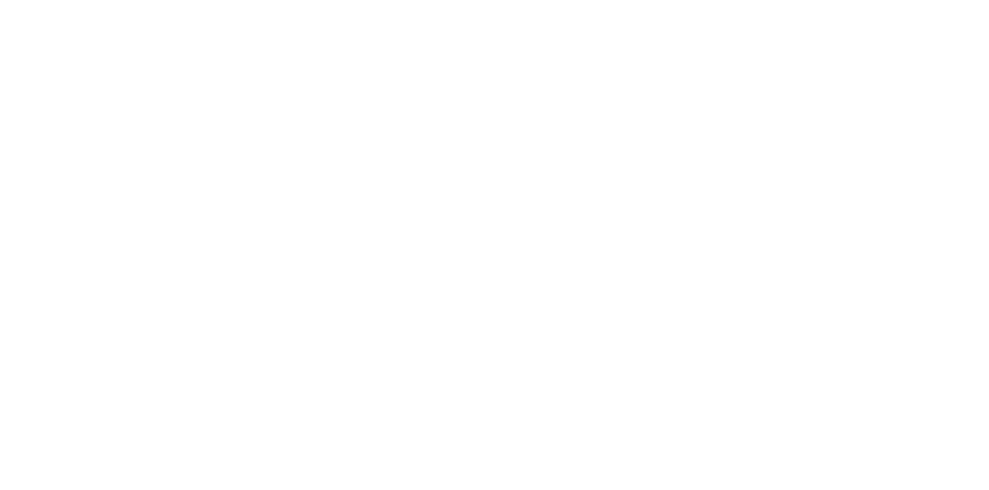

In [22]:

# Function to display image on a plot
def display_image(image_data, ax):
    ax.imshow(image_data)
    ax.axis('off')

# Function to update the plot
def update_plot(b):
    # Add '.jpg' extension to the image names
    image_name1 = text_box1.value.strip() + '.jpg'
    image_name2 = text_box2.value.strip() + '.jpg'
    
    # Find the images in the DataFrame based on the file names entered in text_box1 and text_box2
    selected_image1 = df_images[df_images['File Name'] == text_box1.value]['Image'].values
    selected_image2 = df_images[df_images['File Name'] == text_box2.value]['Image'].values
    
    if len(selected_image1) > 0 and len(selected_image2) > 0:
        ax1.clear()
        ax2.clear()
        
        display_image(selected_image1[0], ax1)
        ax1.set_title(text_box1.value, fontsize=10)
        
        display_image(selected_image2[0], ax2)
        ax2.set_title(text_box2.value, fontsize=10)
        
        fig.canvas.draw()
        with out:
            clear_output(wait=True)
            display(fig)
    else:
        with out:
            clear_output(wait=True)
            print('One or more images not found.')

# Create initial empty plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create initial empty images
ax1.axis('off')
ax2.axis('off')

plt.tight_layout()

# Create text boxes for image paths
text_box1 = widgets.Text(description='Image 1:', value='', continuous_update=False)
text_box2 = widgets.Text(description='Image 2:', value='', continuous_update=False)

# Create update button
button = widgets.Button(description='Update Plots')

# Create output widget
out = widgets.Output()

# Display widgets
display(widgets.HBox([text_box1, text_box2, button]))
display(out)

# Define button click event handler
button.on_click(update_plot)

plt.show()

In [ ]:
# export numpy as npz, or pickle the autoencoder and use embeddings, or just extract embeddings, numpy.load, 
# 